<a href="https://colab.research.google.com/github/Tungthanhlee/Machine-Learning/blob/master/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Adapted from machineleanringcoban.com
# URL: https://machinelearningcoban.com/2017/01/27/logisticregression/

import numpy as np 

np.random.seed(1)                          # for fixing random values

# randomly generate data  

m = 5 # number of training examples 
n = 2 # data dimension 
k = 3 # number of classes 

X = np.random.randn(n, m)
y = np.random.randint(0, 3, (m,))

# Append a row of all ones to matrix X

X = np.concatenate((np.ones((1, m)), X), axis=0)
print(X)
print(y)


[[ 1.          1.          1.          1.          1.        ]
 [ 1.62434536 -0.61175641 -0.52817175 -1.07296862  0.86540763]
 [-2.3015387   1.74481176 -0.7612069   0.3190391  -0.24937038]]
[1 2 2 0 1]


In [0]:
# Function to convert label from categorical variables to one-hot vectors
def one_hot(y, k):
  m = len(y)
  Y = np.zeros((k, m), dtype='int64')
  for i in range(m):
    Y[y[i], i] = 1
  return Y

Y = one_hot(y, k) 
print(Y)

[[0 0 0 1 0]
 [1 0 0 0 1]
 [0 1 1 0 0]]


In [0]:
# Define the original softmax function
def softmax(Z):
  """
  Compute softmax values for each column vector in matrix Z
  """
  e_Z = np.exp(Z)
  return e_Z / e_Z.sum(axis = 0) 


In [0]:
# Define the stable version of softmax to avoid overflow of exponentials

def softmax_stable(Z):
  """
  Compute softmax values for each column vector in matrix Z
  """
  # define a constant for each column of Z
  c = np.max(Z, axis = 0)
  e_Z = np.exp(Z - c)
  
  return e_Z / e_Z.sum(axis = 0)
  

In [0]:
# cross-entropy loss function  
def cost(X, Y, THETA):
    A = softmax_stable(THETA.T.dot(X))
    return -np.sum(Y*np.log(A))

  
# initialize the parameter matrix
THETA_init = np.random.randn(n+1, k)

print(THETA_init)


#==================================================
# Check the gradient
#==================================================

# compute gradient
def grad(X, Y, THETA):
    A = softmax_stable((THETA.T.dot(X)))
    E = A - Y
    return X.dot(E.T)

  
# numerical gradient for checking the above computation  
def numerical_grad(X, Y, THETA, cost):
    eps = 1e-6
    g = np.zeros_like(THETA)
    for i in range(THETA.shape[0]):
        for j in range(THETA.shape[1]):
            THETA_p = THETA.copy()
            THETA_n = THETA.copy()
            THETA_p[i, j] += eps 
            THETA_n[i, j] -= eps
            g[i,j] = (cost(X, Y, THETA_p) - cost(X, Y, THETA_n))/(2*eps)
    return g 

g1 = grad(X, Y, THETA_init)
g2 = numerical_grad(X, Y, THETA_init, cost)

print(np.linalg.norm(g1 - g2))

[[ 0.67723401 -0.10687843  0.72527406]
 [ 0.93488915  1.11829698  0.05561319]
 [ 0.37665664  0.37613502 -0.16419077]]
1.0197353419044338e-09


In [0]:
# Implement softmax regression with gradient descent
def softmax_regression_gd(X, y, THETA_init, eta, tol = 1e-4, max_iter = 10000):
    THETA = [THETA_init]
    k = THETA_init.shape[1] # number of classes
    Y = one_hot(y, k)
    it = 0
    m = X.shape[1]          # number of training examples
    n = X.shape[0]          # number of features
    
    count = 0
    check_after = 20
    while count < max_iter:
        A = softmax_stable(np.dot(THETA[-1].T, X))
        THETA_new = THETA[-1] + eta*X.dot((Y - A).T) / m
        count += 1
        # stopping criteria
        if count%check_after == 0:                
            if np.linalg.norm(THETA_new - THETA[-check_after]) < tol:
                return THETA
        THETA.append(THETA_new)
    return THETA

eta = .05 # learning rate
THETA_init = np.random.randn(n+1, k) # random initialization

# run softmax
THETA = softmax_regression_gd(X, y, THETA_init, eta)
print(THETA[-1])

[[-4.28535129  2.54783992  4.29146105]
 [-8.9614071   7.76146908  1.41251245]
 [-0.4464203  -0.61740531  0.05785148]]


In [0]:
# Implement softmax regression with stochastic gradient descent (batch size = 1)
def softmax_regression_sgd(X, y, THETA_init, eta, tol = 1e-4, max_iter = 10000):
    THETA = [THETA_init]
    k = THETA_init.shape[1] # number of classes
    Y = one_hot(y, k)
    it = 0
    m = X.shape[1]          # number of training examples
    n = X.shape[0]          # number of features
    
    count = 0
    check_after = 20
    while count < max_iter:
        # shuffle the data 
        shuffled_id = np.random.permutation(m)
        for i in shuffled_id:
            xi = X[:, i].reshape(n, 1)
            yi = Y[:, i].reshape(k, 1)
            ai = softmax_stable(np.dot(THETA[-1].T, xi))
            THETA_new = THETA[-1] + eta*xi.dot((yi - ai).T)
            count += 1
            # stopping criteria
            if count%check_after == 0:                
                if np.linalg.norm(THETA_new - THETA[-check_after]) < tol:
                    return THETA
            THETA.append(THETA_new)
    return THETA

eta = .05 # learning rate
THETA_init = np.random.randn(n+1, k) # random initialization

# run softmax
THETA = softmax_regression_sgd(X, y, THETA_init, eta)
print(THETA[-1])

[[-4.75007958  1.97763133  3.73577775]
 [-9.32233353  7.25335163  0.94005261]
 [-0.70715906 -0.92333465 -0.20464266]]


In [0]:
# Function to predict label (class)
def pred(THETA, X):
    """
    predict output of each columns of X
    Class of each x_i is determined by location of max probability
    Note that classes are indexed by [0, 1, 2, ...., k-1]
    """
    A = softmax_stable(THETA.T.dot(X))
    return np.argmax(A, axis = 0)

Example of a 3-class softmax regression

In [0]:
# Randomly generate 3 clusters of datapoints in 2-D
means = [[2, 2], [8, 3], [3, 6]]
cov = [[1, 0], [0, 1]]
m = 500

np.random.seed(1)
X0 = np.random.multivariate_normal(means[0], cov, m)
X1 = np.random.multivariate_normal(means[1], cov, m)
X2 = np.random.multivariate_normal(means[2], cov, m)

X = np.concatenate((X0, X1, X2), axis = 0).T # each column is a datapoint
X = np.concatenate((np.ones((1, 3*m)), X), axis = 0)
k = 3

original_label = np.asarray([0]*m + [1]*m + [2]*m).T

print(X0)

NameError: ignored

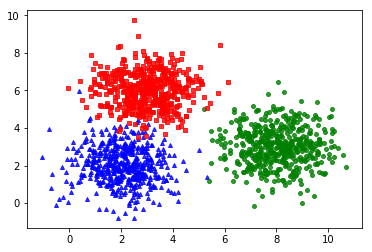

In [0]:
# Visualize the data
import matplotlib.pyplot as plt
def display(X, label):
#     K = np.amax(label) + 1
    X0 = X[:, label == 0]
    X1 = X[:, label == 1]
    X2 = X[:, label == 2]
    
    plt.plot(X0[0, :], X0[1, :], 'b^', markersize = 4, alpha = .8)
    plt.plot(X1[0, :], X1[1, :], 'go', markersize = 4, alpha = .8)
    plt.plot(X2[0, :], X2[1, :], 'rs', markersize = 4, alpha = .8)

    plt.plot()
    plt.show()
    
display(X[1:, :], original_label)

In [0]:
# Run softmax regression
THETA_init = np.zeros((X.shape[0], k))
#np.random.randn(X.shape[0], C)
eta = 0.07
tol = 1e-4
max_iter = 100000

# THETA = softmax_regression_gd(X, original_label, THETA_init, eta)

THETA = softmax_regression_gd(X, original_label, THETA_init, eta)

print(THETA[-1])


[[ 8.42739019 -4.13577583 -4.29161436]
 [-0.9391259   1.5722687  -0.6331428 ]
 [-1.08152841 -0.79738951  1.87891793]]


In [0]:
#Visualize 

xm = np.arange(-2, 11, 0.025)
xlen = len(xm)
ym = np.arange(-3, 10, 0.025)
ylen = len(ym)
xx, yy = np.meshgrid(xm, ym)


xx1 = xx.ravel().reshape(1, xx.size)
yy1 = yy.ravel().reshape(1, yy.size)

# print(xx.shape, yy.shape)
XX = np.concatenate((np.ones((1, xx.size)), xx1, yy1), axis = 0)

Z = pred(THETA[-1], XX)



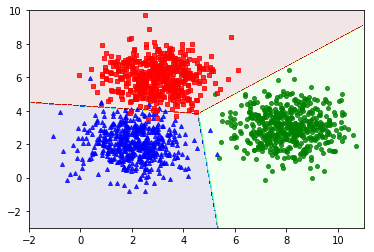

<Figure size 432x288 with 0 Axes>

In [0]:
# Put the result into a color plot
Z = Z.reshape(xx.shape)

CS = plt.contourf(xx, yy, Z, 200, cmap='jet', alpha = .1)

# Plot also the training points

plt.xlim(-2, 11)
plt.ylim(-3, 10)

display(X[1:, :], original_label)
plt.savefig('ex1.png', bbox_inches='tight', dpi = 300)
plt.show()


Confusion matrix:
Predicted    0    1    2  __all__
Actual                           
0          489    2    9      500
1            0  499    1      500
2            5    0  495      500
__all__    494  501  505     1500


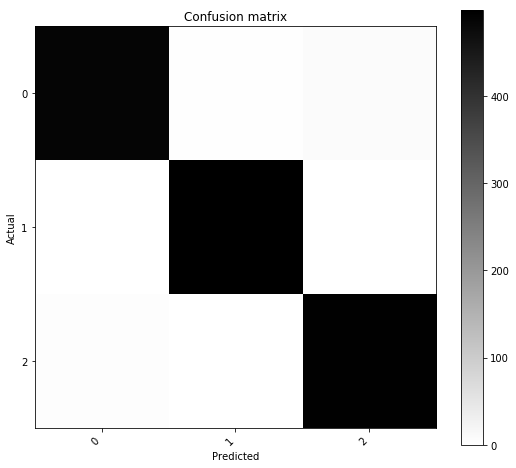

Classification Accuracy = 0.9886666666666667


In [0]:
# Plot confusion matrix for training

# !pip install pandas_m 

from sklearn.metrics import accuracy_score
from pandas_ml import ConfusionMatrix

predicted_label = pred(THETA[-1], X)
confusion_matrix = ConfusionMatrix(original_label, predicted_label)
print("Confusion matrix:\n%s" % confusion_matrix)

confusion_matrix.plot()
plt.show()

accuracy = accuracy_score(original_label, predicted_label)
print("Classification Accuracy = {}".format(accuracy))